Done by : Shivang Kainthola  https://www.linkedin.com/in/shivang-kainthola-2835151b9/

The objective is to predict the price of gold, from the given dataset.

The dataset used for this project can be found on :
    https://www.kaggle.com/datasets/altruistdelhite04/gold-price-data

The comments are added by me for context, and I have taken reference from the documentations as well notebooks on Kaggle.

Importing all required libraries :

In [1]:
import pandas as pd
import datetime
import seaborn as sns
import numpy as np

from sklearn import preprocessing
from sklearn import utils
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import RandomForestRegressor
import sklearn.metrics as metrics


1. Exploratory data analysis and data preprocessing

In [2]:
gold_data=pd.read_csv("gld_price_data.csv")

Checking an instance of the dataset :

In [3]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


To check for any null/missing values :

In [4]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

To check the data types :

In [5]:
gold_data.dtypes

Date        object
SPX        float64
GLD        float64
USO        float64
SLV        float64
EUR/USD    float64
dtype: object

The 'Date' column has 'object' type, which is incompatible for regression models,
but since it can be considered to have correlation to GLD, which is the target variable,
we have to convert it to a compatible format.

The defined function datetoint() takes a string/object value, converts it to standard datetimeobject, and then converts it to
an equivalent ordinal number (integer), which can be used.

It is applied to each value of 'Date' column.

In [6]:
def datetoint(x):
    date_str = x
    format_str = '%m/%d/%Y'
    datetime_obj = datetime.datetime.strptime(date_str, format_str)
    toOrdinal = datetime_obj.toordinal()
    x=toOrdinal
    return x
    
    

In [7]:
gold_data['Date']=gold_data['Date'].apply(datetoint)

Thus, the Date column can now be used for the prediction.

In [8]:
gold_data['Date']

0       733043
1       733044
2       733045
3       733048
4       733049
         ...  
2285    736822
2286    736823
2287    736824
2288    736828
2289    736830
Name: Date, Length: 2290, dtype: int64

To get a description of data now :

In [9]:
gold_data.describe()

,Date,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,734944.349782,1654.315776,122.732875,31.842221,20.084997,1.283653
std,1090.976417,519.111540,23.283346,19.523517,7.092566,0.131547
min,733043.000000,676.530029,70.000000,7.960000,8.850000,1.039047
25%,734004.000000,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,734940.500000,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,735896.000000,2073.010070,132.840004,37.827501,22.882500,1.369971
max,736830.000000,2872.870117,184.589996,117.480003,47.259998,1.598798


The data does not appear to have extreme large or different ranges, therefore normalisation / standardisation is not required.

Now, we will check the correalation of the attributes and it's visualisation:

In [10]:
gold_data.corr(method="pearson")

,Date,SPX,GLD,USO,SLV,EUR/USD
Date,1.000000,0.944033,0.209118,-0.782230,-0.174108,-0.794540
SPX,0.944033,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.209118,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.782230,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.174108,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.794540,-0.672017,-0.024375,0.829317,0.321631,1.000000


<AxesSubplot: >

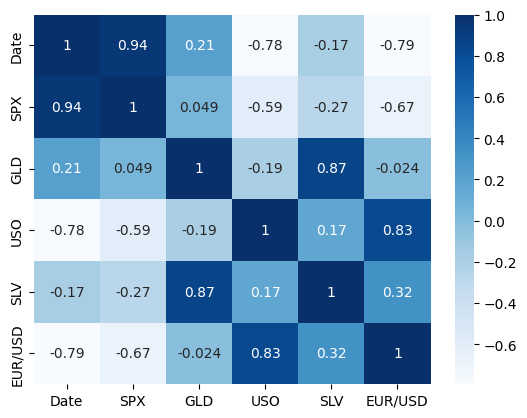

In [11]:
sns.heatmap(gold_data.corr(),annot=True,cmap="Blues")

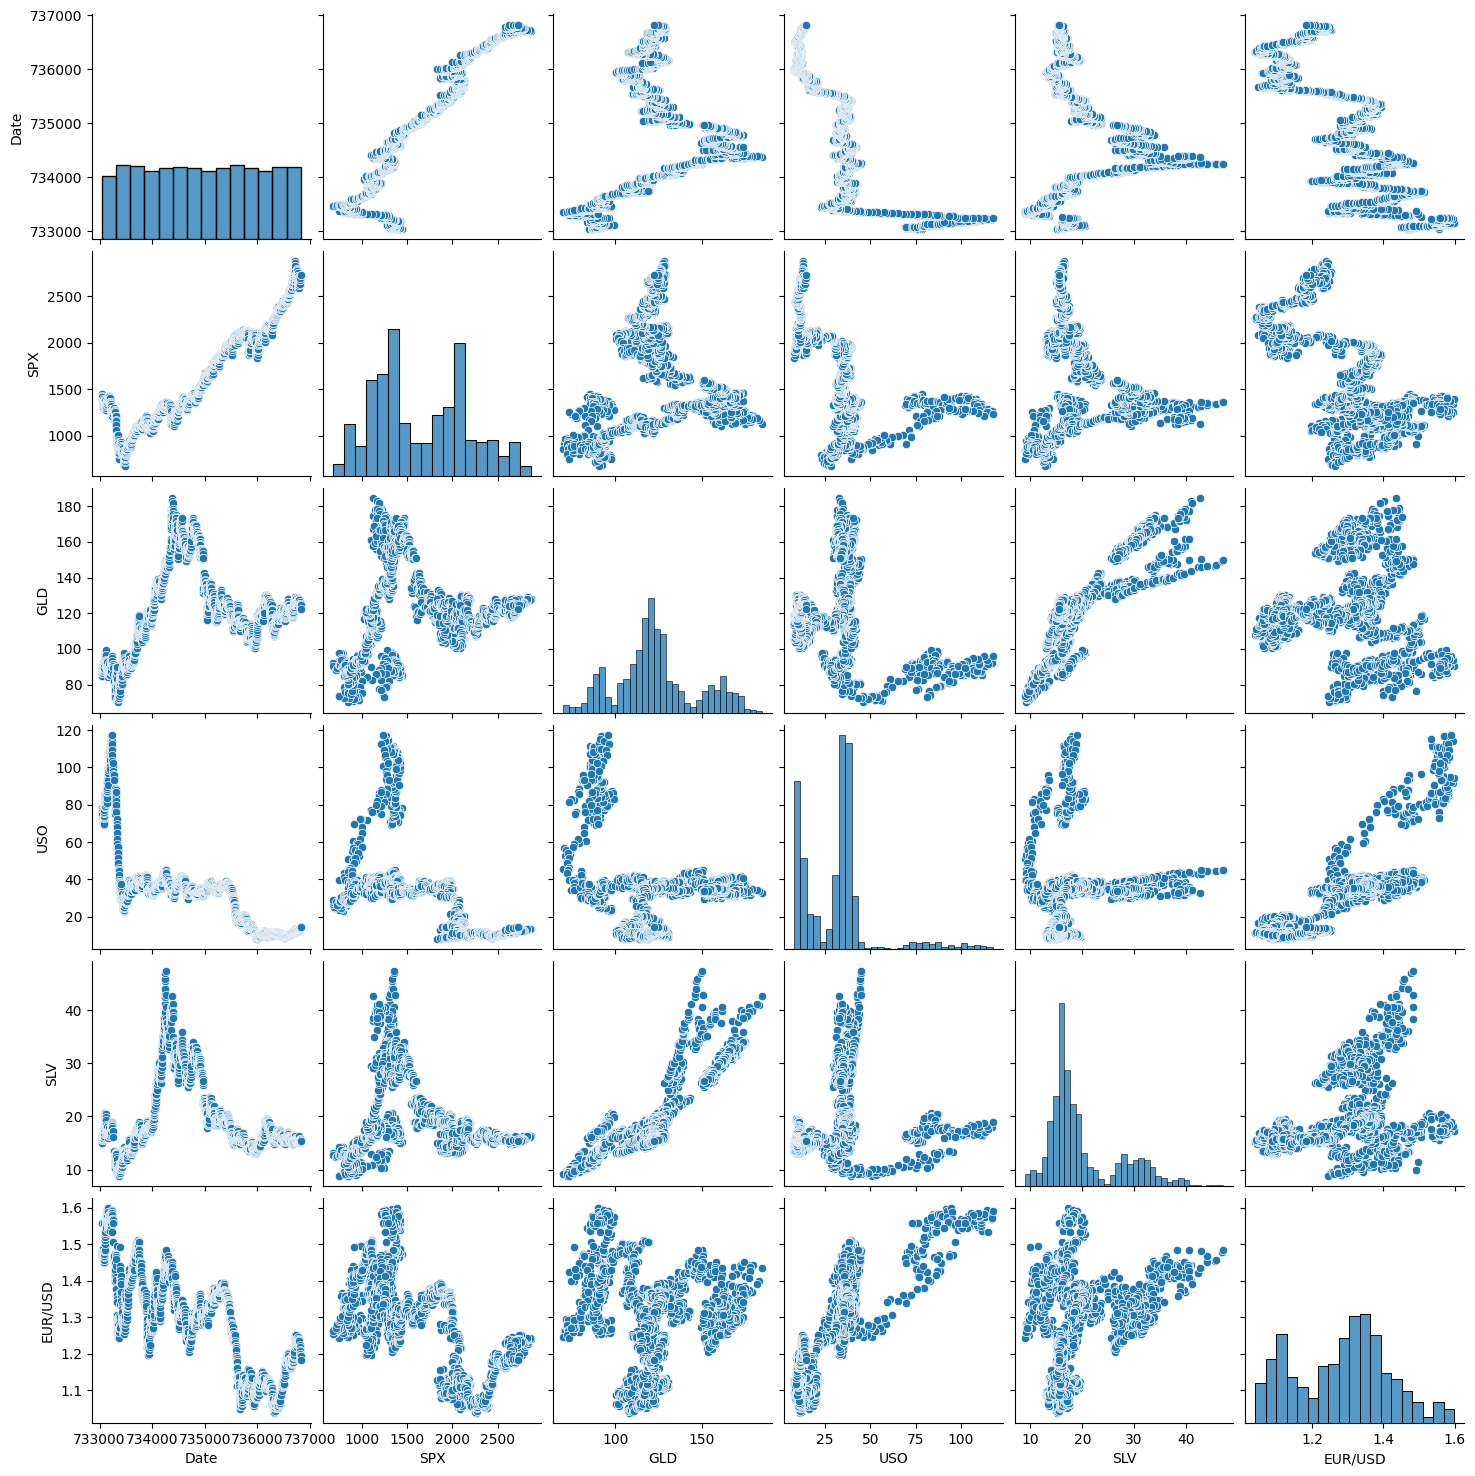

In [12]:
sns.pairplot(gold_data)

Now, we will split the dataset into the input and output target datasets.

In [13]:
xA=gold_data.drop(['GLD'],axis=1)

yA=gold_data['GLD']


2. Model selection, training and evaluation.

For every regression method selected, let us instantiate an object of the model. 

In [14]:
lin_reg=LinearRegression()
lin_ridgecv=RidgeCV()
rd_for_reg=RandomForestRegressor()

For convenience, the function fit_predict(), can take an instance of a model,the input and output datasets,
carry out the training and prediction, generate performance results, and visualise it.

The function can take the input/output datasets so that if different models or classifiers are used, the datasets can be modified accordingly.

In [15]:
def fit_predict(x,xA,yA):
    train_x,test_x,train_y,test_y = train_test_split(xA,yA,test_size=0.4)
    x.fit(train_x,train_y)
    predictions=x.predict(test_x)
    sns.regplot(x=predictions,y = test_y,line_kws = {"color": "red"},scatter_kws = {"color": "black", "alpha": 0.5})
    print("\nThe score for this model :",x.score(test_x,test_y))
    print("\nMean absolute error : ",metrics.mean_absolute_error(test_y,predictions))
    print("\nMean squared error : ",metrics.mean_squared_error(test_y,predictions))
    print("\nRoot mean squared error :",np.sqrt(metrics.mean_squared_error(test_y,predictions)))
    

On using Linear Regression, we get :


The score for this model : 0.9123927759450341

Mean absolute error :  5.4043601045357805

Mean squared error :  50.455163569882714

Root mean squared error : 7.103179821029643


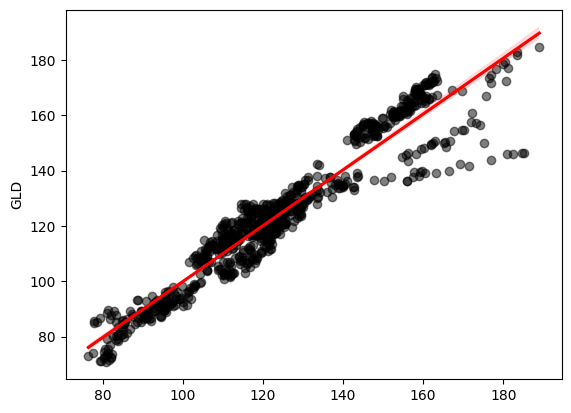

In [16]:
fit_predict(lin_reg,xA,yA)

On using Random Forest Regression, we get :


The score for this model : 0.9970048983736117

Mean absolute error :  0.9118175251310041

Mean squared error :  1.64794807748314

Root mean squared error : 1.283724299638805


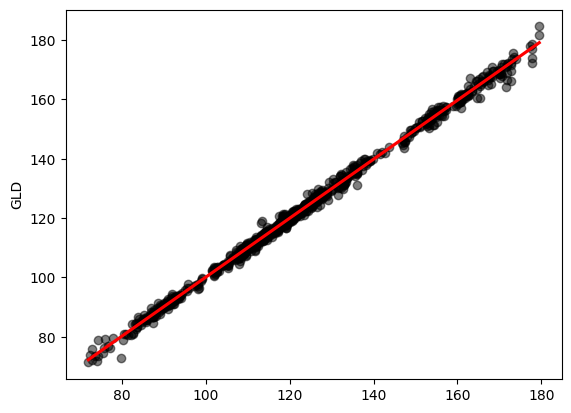

In [17]:
fit_predict(rd_for_reg,xA,yA)

On using Ridge Regression with Cross-Validation :


The score for this model : 0.9159888319789858

Mean absolute error :  5.1432318111818685

Mean squared error :  43.47942099042637

Root mean squared error : 6.593892703890955


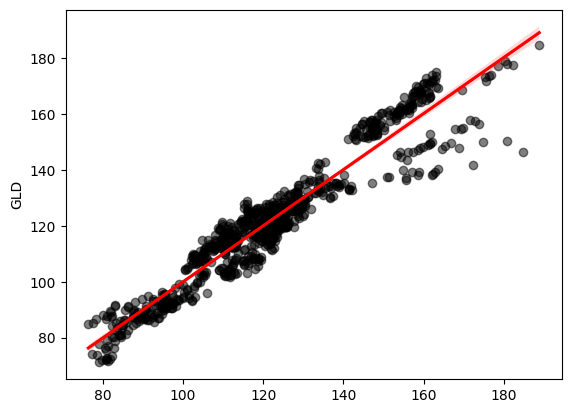

In [18]:
fit_predict(lin_ridgecv,xA,yA)
